In [1]:
#for data manipulations
import pandas as pd
from pandas.api.types import CategoricalDtype

#for numerical calculations
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#for datetime manipulation
from datetime import timedelta
from datetime import datetime

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

In [4]:

#Machine learning library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

#### Install packages

In [ ]:
!pip install pystan==2.17

In [ ]:
!pip install kats==0.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.5/612.5 KB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.8/39.8 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 72.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 KB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.3/950.3 KB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.9/347.9 KB 36.8 MB/s eta 0:00:00
     ━━━━━━

In [ ]:
!pip install kats

In [ ]:
!pip install lunarcalendar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Load data

In [5]:
path = "/content/drive/MyDrive/conrad assignement/train.csv"

In [7]:
df=pd.read_csv(path)

In [ ]:
df

,productsGroup_key,date_key,quantitySales
0,1,20190902,26784.0
1,1,20190903,7432.0
2,1,20190904,1424.0
3,1,20190905,608.0
4,1,20190906,776.0
...,...,...,...
242395,297,20211123,18.0
242396,297,20211124,16.0
242397,297,20211125,16.0
242398,297,20211126,16.0


###Data preprocessing

Checking null values

In [8]:
df[df.isnull().any(axis=1)]

,productsGroup_key,date_key,quantitySales


Converting date column into the right type

In [9]:
df['date_key']=pd.to_datetime(df['date_key'], format='%Y%m%d')

Creating temporal features

In [10]:
df['year'] = pd.to_datetime(df['date_key']).dt.year
df['month'] = df['date_key'].dt.month
df['month_year'] = df['date_key'].dt.to_period('M')
df['day_of_week'] = df['date_key'].dt.dayofweek
day_name = {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}
df['day_name'] = df['day_of_week'].map(day_name)
df['quarter'] = df['date_key'].dt.quarter
df['weekofyear'] = df['date_key'].dt.weekofyear

In [11]:
df['day'] = df['date_key'].dt.day

In [ ]:
df

,productsGroup_key,date_key,quantitySales,year,month,month_year,day_of_week,day_name,quarter,weekofyear,day
0,1,2019-09-02,26784.0,2019,9,2019-09,0,Monday,3,36,2
1,1,2019-09-03,7432.0,2019,9,2019-09,1,Tuesday,3,36,3
2,1,2019-09-04,1424.0,2019,9,2019-09,2,Wednesday,3,36,4
3,1,2019-09-05,608.0,2019,9,2019-09,3,Thursday,3,36,5
4,1,2019-09-06,776.0,2019,9,2019-09,4,Friday,3,36,6
...,...,...,...,...,...,...,...,...,...,...,...
242395,297,2021-11-23,18.0,2021,11,2021-11,1,Tuesday,4,47,23
242396,297,2021-11-24,16.0,2021,11,2021-11,2,Wednesday,4,47,24
242397,297,2021-11-25,16.0,2021,11,2021-11,3,Thursday,4,47,25
242398,297,2021-11-26,16.0,2021,11,2021-11,4,Friday,4,47,26


In [20]:
df1=df.set_index("date_key")

In [12]:
#X=df[["productsGroup_key","quantitySales","year","month","day_of_week","day","quarter","weekofyear","date_key"]]
#X=df1[["productsGroup_key","quantitySales","year","month","day_of_week","day"]]

In [67]:
features=["productsGroup_key","quantitySales","year","month","day_of_week","day","quarter","weekofyear"]

### Data analysis

In [38]:
X.describe()

,productsGroup_key,quantitySales,year,month,day_of_week,day,quarter,weekofyear
count,242400.000000,2.424000e+05,242400.000000,242400.000000,242400.000000,242400.000000,242400.000000,242400.000000
mean,148.684088,4.038232e+03,2020.256877,6.890516,2.999542,15.685309,2.631506,28.252215
std,85.696190,1.015878e+04,0.698231,3.437769,1.999795,8.776865,1.124618,15.060981
min,1.000000,1.000000e+01,2019.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,75.000000,3.740000e+02,2020.000000,4.000000,1.000000,8.000000,2.000000,15.000000
50%,149.000000,1.230000e+03,2020.000000,7.000000,3.000000,16.000000,3.000000,30.000000
75%,223.000000,3.410000e+03,2021.000000,10.000000,5.000000,23.000000,4.000000,41.000000
max,297.000000,1.395774e+06,2021.000000,12.000000,6.000000,31.000000,4.000000,53.000000


From the descriptive statistics about productsGroup_key we can see that the data is balanced and that the sales are collected at the same intervals.

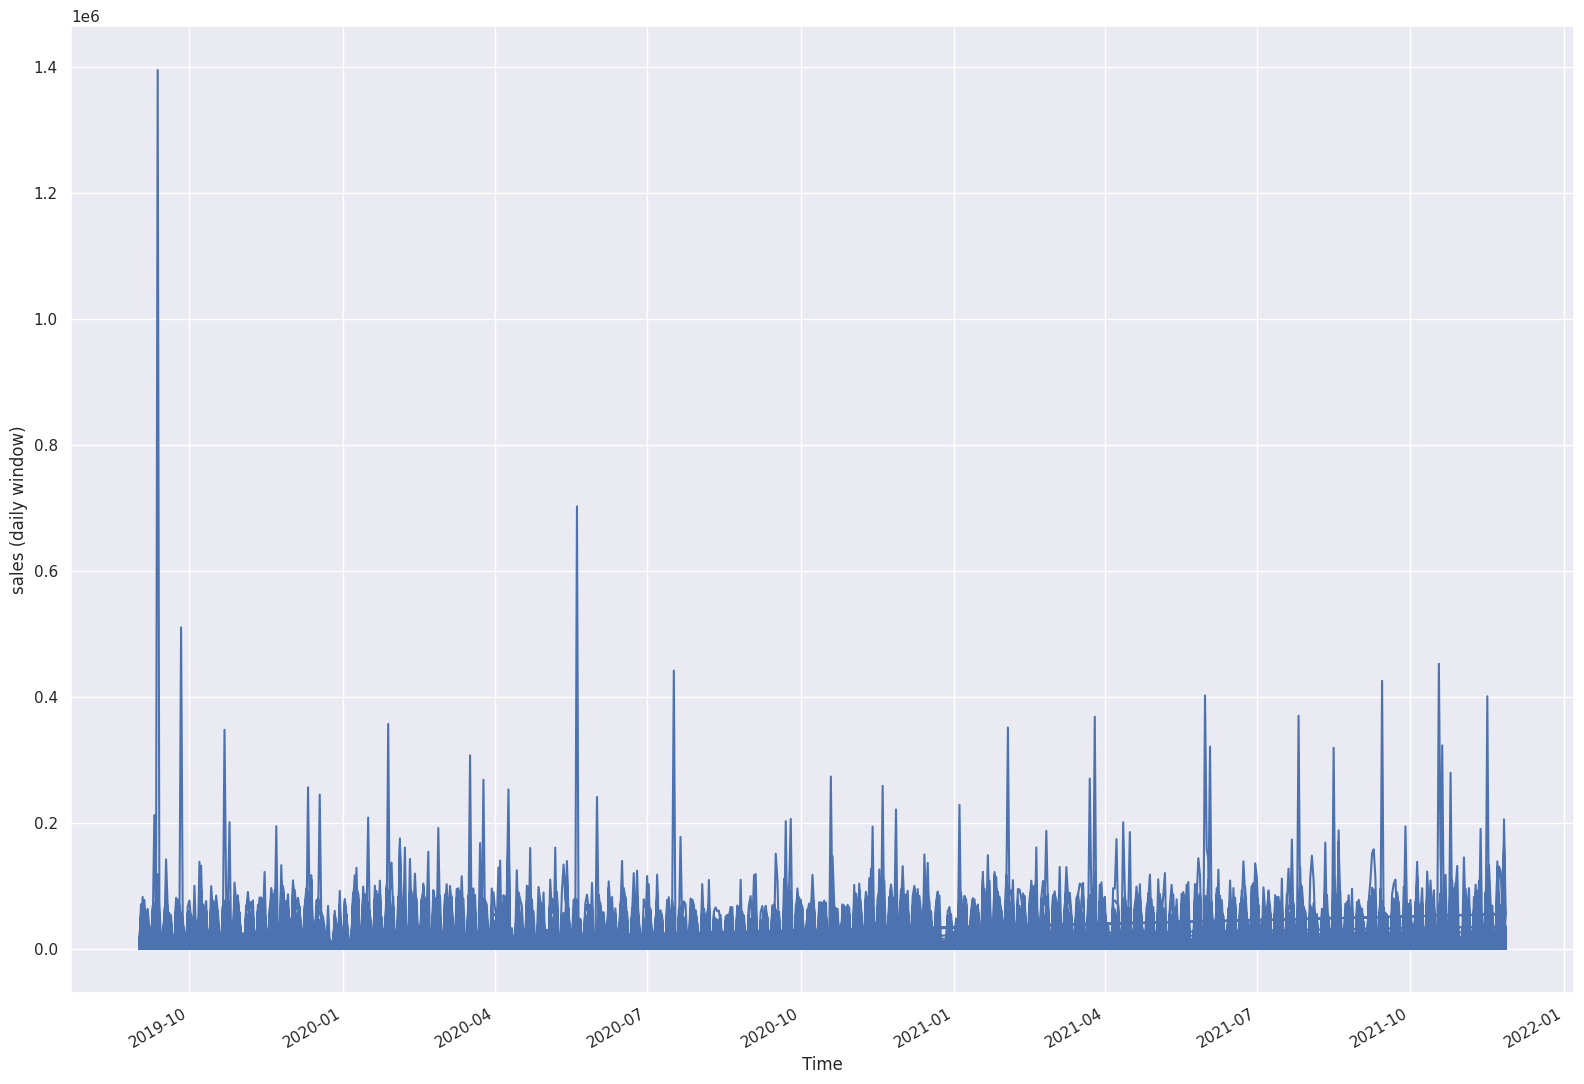

In [ ]:
fig, ax = plt.subplots(figsize=(16, 11))

ax.plot(df1.quantitySales)

ax.set_xlabel('Time')
ax.set_ylabel('sales (daily window)')
fig.autofmt_xdate()
plt.tight_layout()

The data shows that there are some outliers and removing some measures aroud the dates 2019-10 and 2020-06 can be useful.

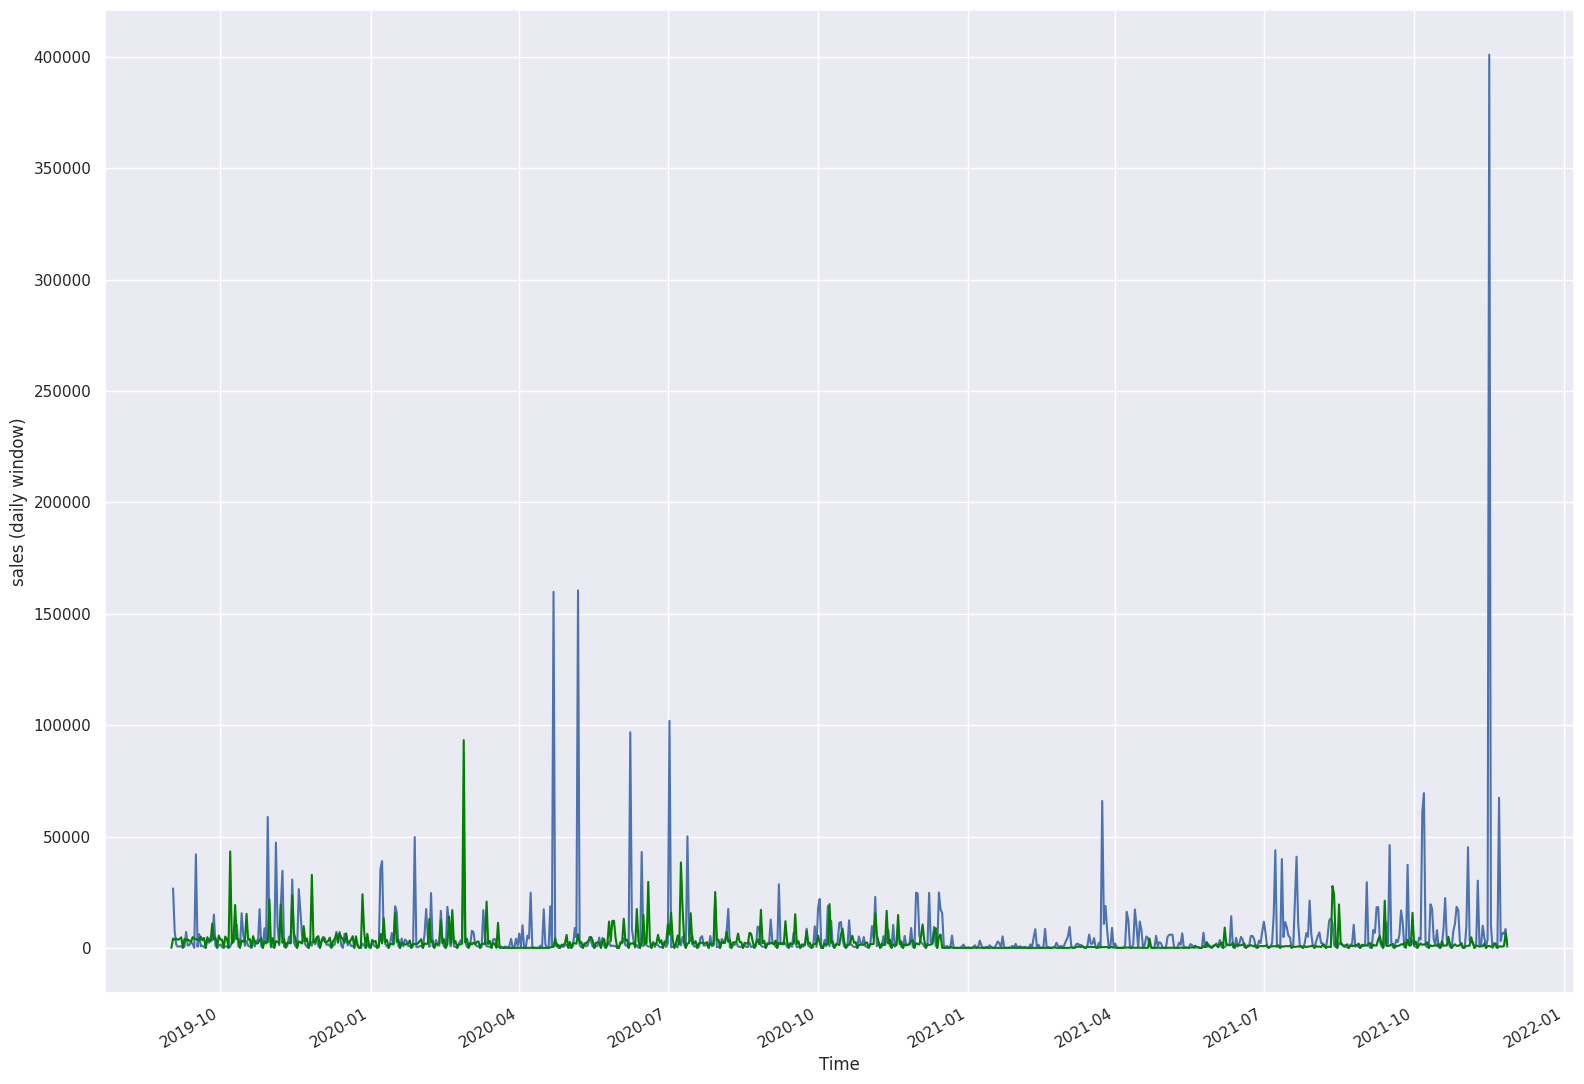

In [ ]:
fig, ax = plt.subplots(figsize=(16, 11))

ax.plot(df1[df1.productsGroup_key==1].quantitySales)

ax.plot(df1[df1.productsGroup_key==2].quantitySales,color="green")
ax.set_xlabel('Time')
ax.set_ylabel('sales (daily window)')
fig.autofmt_xdate()
plt.tight_layout()

This figure shows that the product categories timeseries don't show necessarily the same patterns.

#### Exploratory Data analysis

In [22]:
df1.head()

,productsGroup_key,quantitySales,year,month,month_year,day_of_week,day_name,quarter,weekofyear,day
date_key,,,,,,,,,,
2019-09-02,1,26784.0,2019,9,2019-09,0,Monday,3,36,2
2019-09-03,1,7432.0,2019,9,2019-09,1,Tuesday,3,36,3
2019-09-04,1,1424.0,2019,9,2019-09,2,Wednesday,3,36,4
2019-09-05,1,608.0,2019,9,2019-09,3,Thursday,3,36,5
2019-09-06,1,776.0,2019,9,2019-09,4,Friday,3,36,6


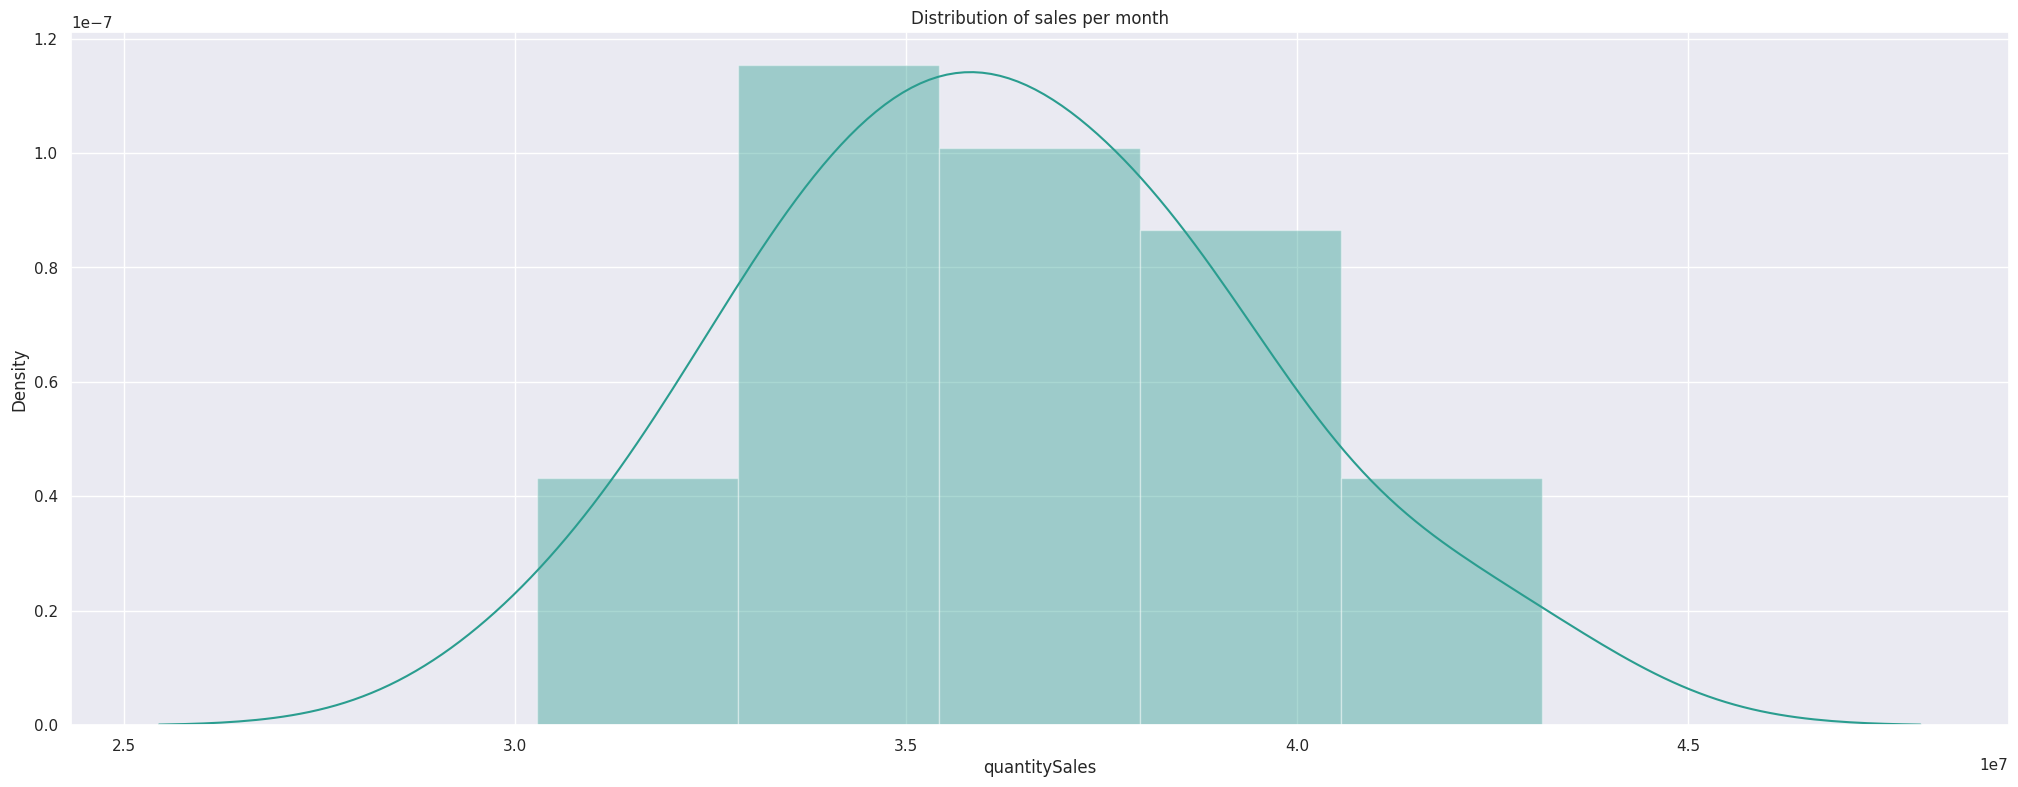

In [65]:
sales_month=df1.groupby("month_year")['quantitySales'].sum()
fig, ax = plt.subplots(figsize=(25,9))
sns.distplot(sales_month, kde= True,hist=True, color = "#2a9d8f")
plt.title('Distribution of sales per month')
plt.show()

The distribution of sales per month follows a bell shape. The sales follow a normal distribution over time.

<Axes: ylabel='quantitySales'>

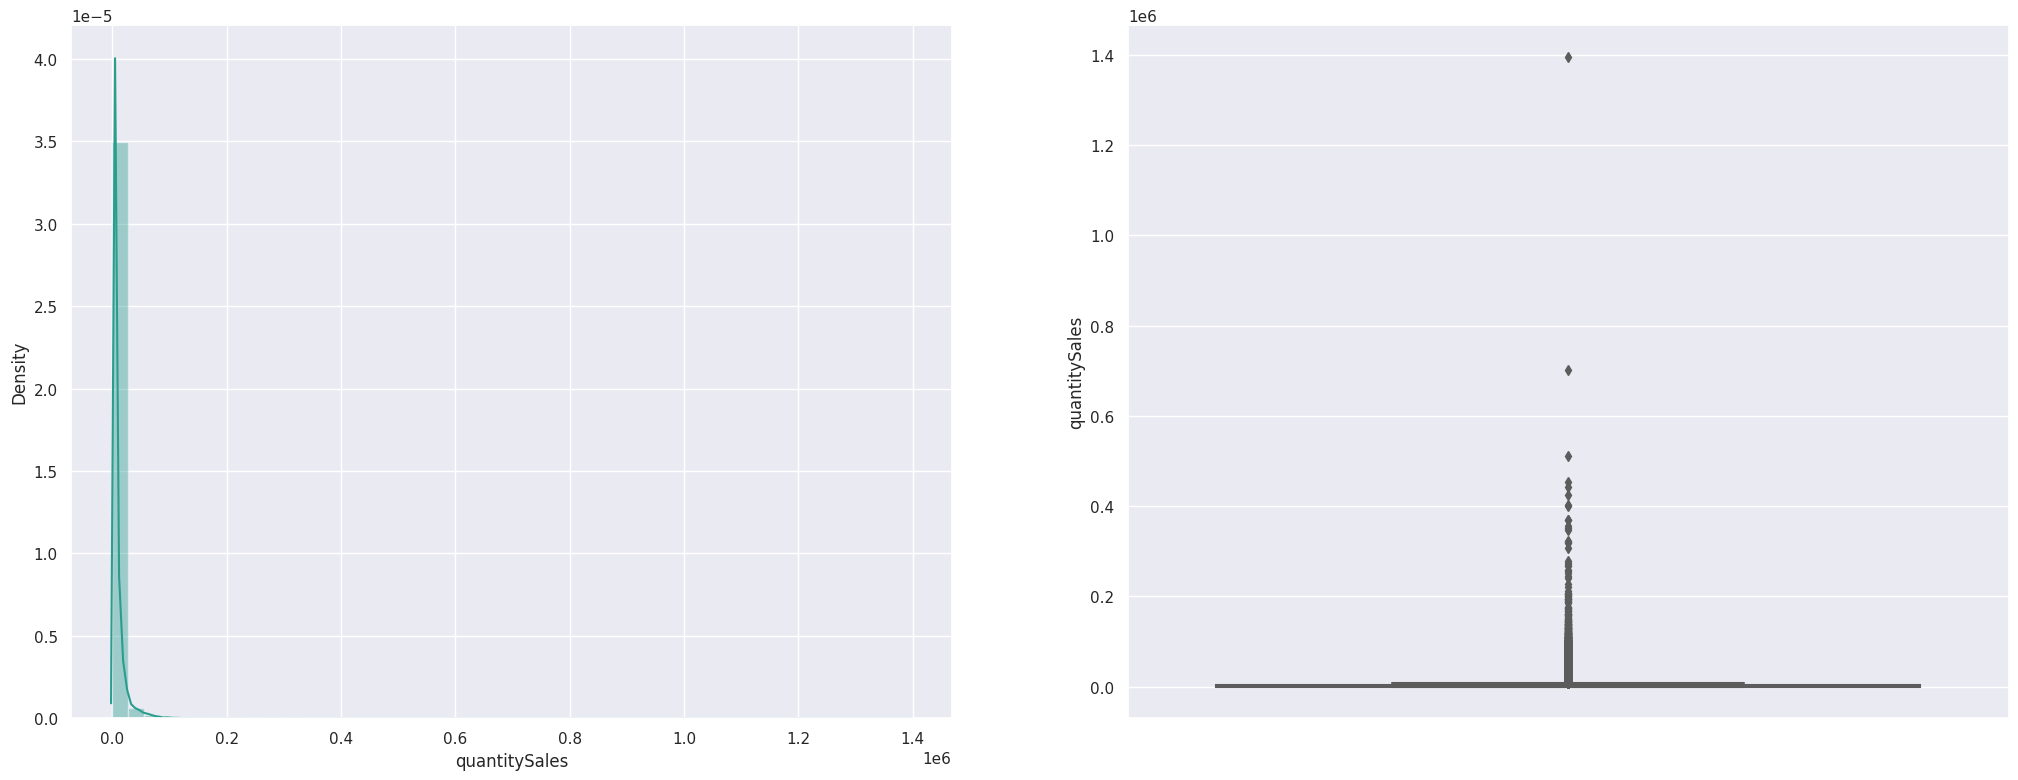

In [25]:
plt.figure(figsize=(25, 9))
plt.subplot(121)
sns.distplot(df1.loc[:, 'quantitySales'], kde= True,hist = True ,color = "#2a9d8f")    
plt.subplot(122)
sns.boxplot(y="quantitySales", data=df1, color="#ff355d")

#### Correlation matrix

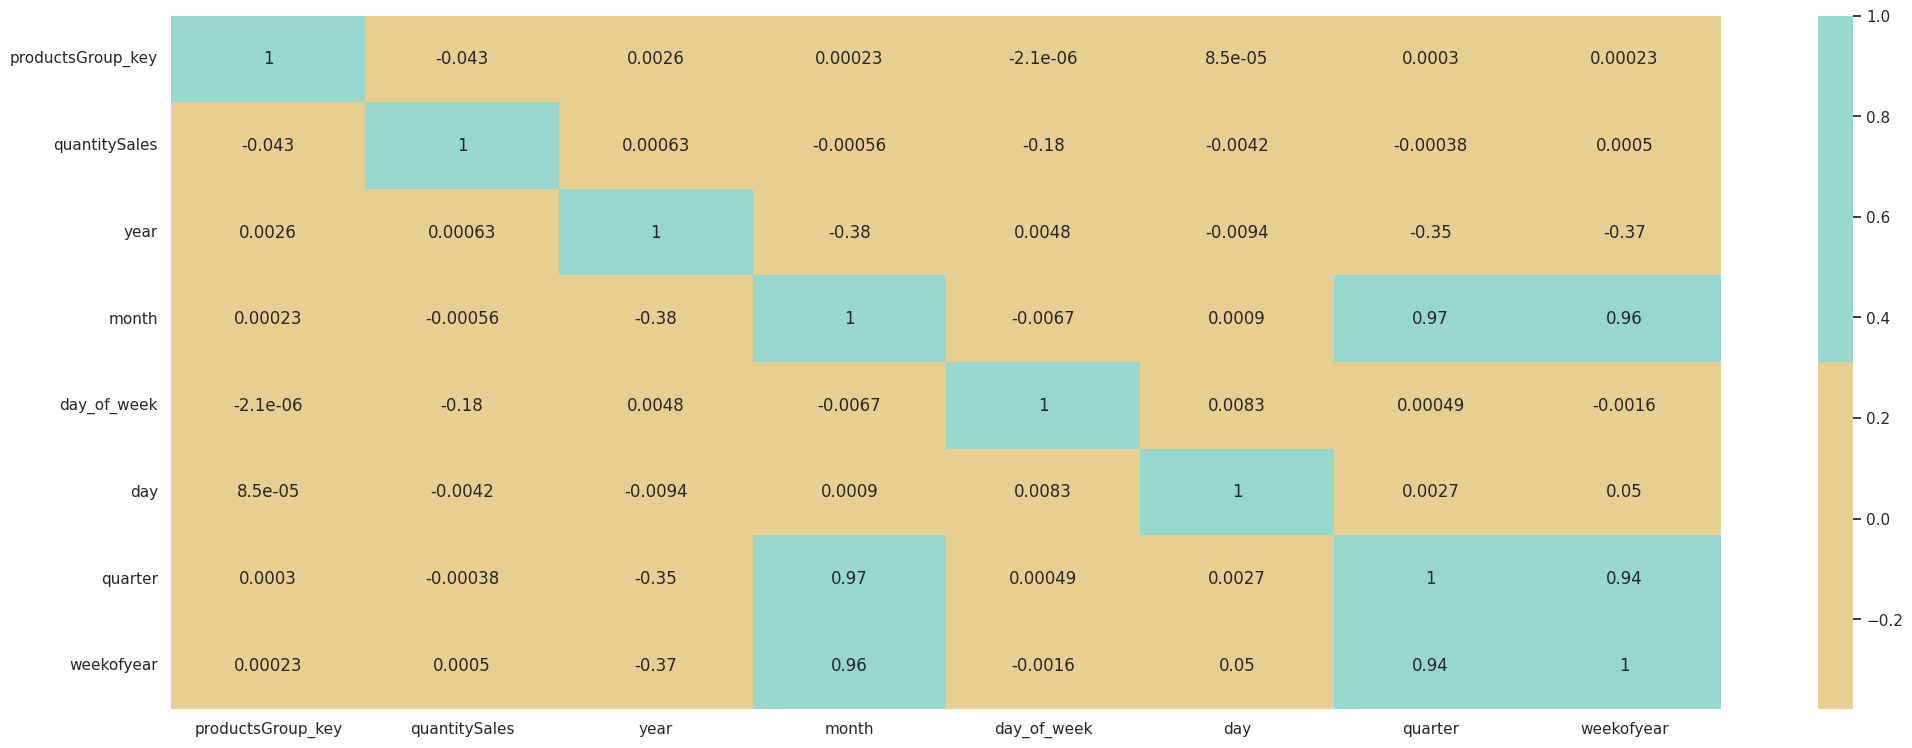

In [69]:
plt.figure(figsize=(25, 9))
sns.heatmap(df1[[f'{feature}' for feature in features]].corr(),annot=True ,cmap=sns.color_palette("BrBG",2));

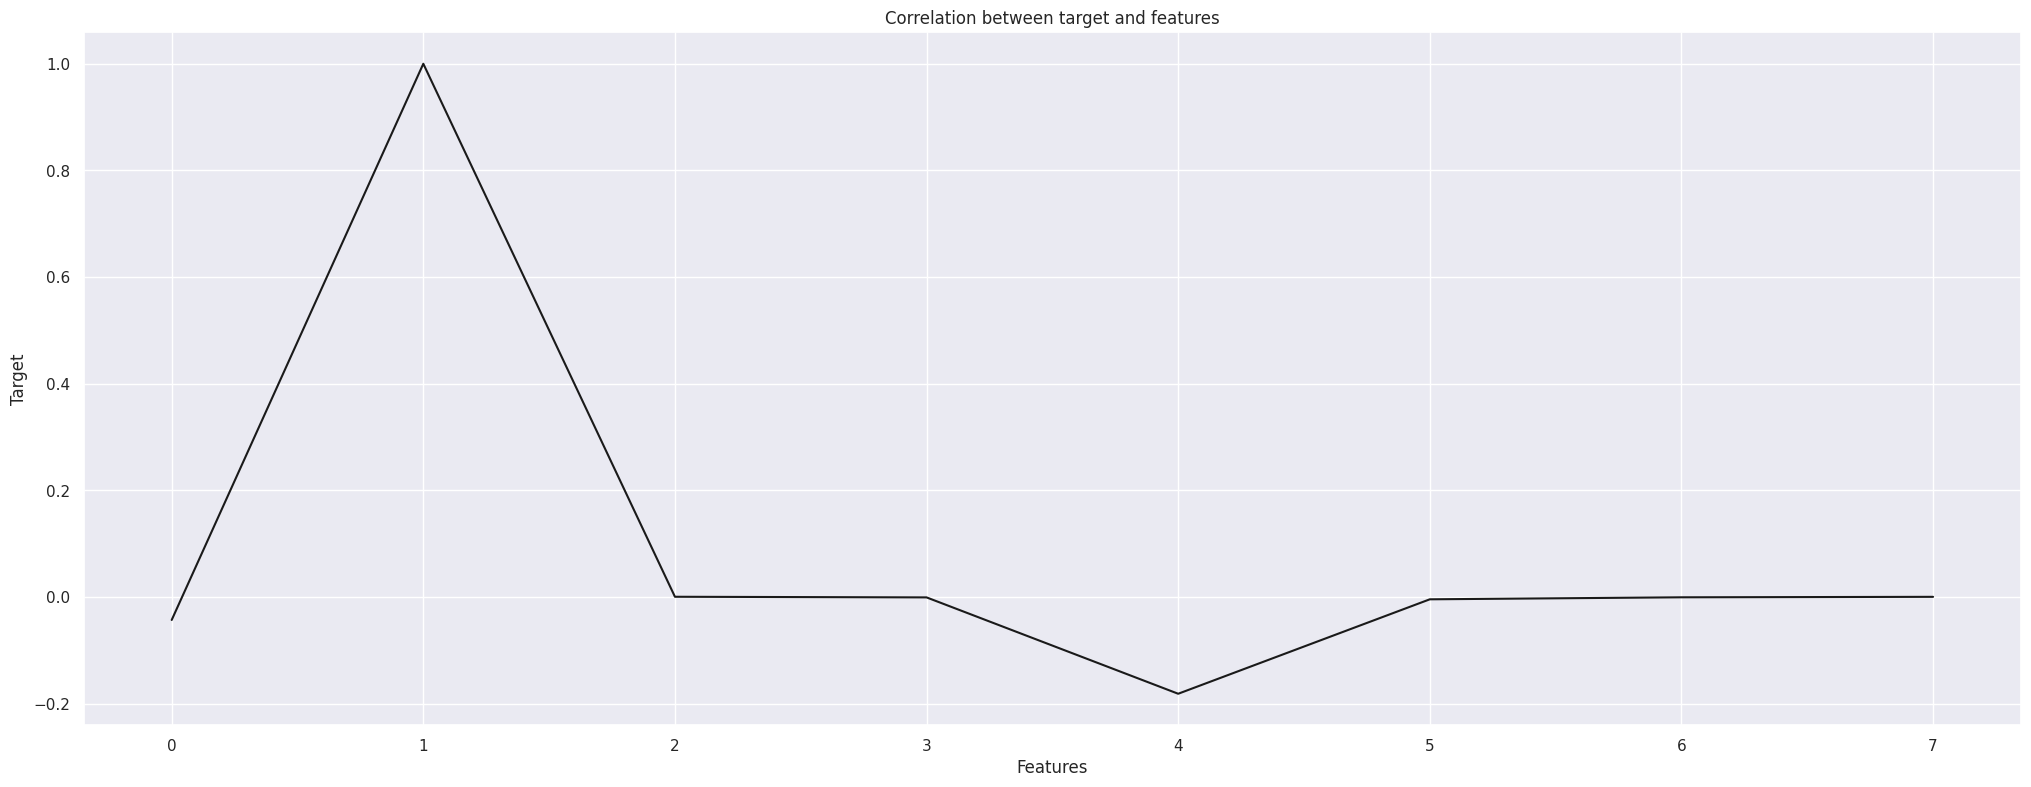

In [68]:
corr = []
for feature in features:
    corr.append( df1['quantitySales'].corr(df1[f'{feature}']) )
    
plt.figure(figsize=(25,9))
plt.plot(corr, 'k')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Correlation between target and features')
plt.show()

The correlation matrix proves there's no linear dependency between the features and the target and thus a linear model should be avoided

#### Detecting outliers

In [26]:
q1 = np.percentile(df.quantitySales, 25)
q2 = np.percentile(df.quantitySales, 50)
q3 = np.percentile(df.quantitySales, 75)

print("Q1: ", q1)
print("Q2: ", q2)
print("Q3: ", q3)

Q1:  374.0
Q2:  1230.0
Q3:  3410.0


In [30]:
iqr = q3 - q1

# outlier boundaries
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [35]:
outliers = df[(df["quantitySales"] < lower_bound) | (df["quantitySales"] > upper_bound)]
print(outliers.head())
df = df.drop(outliers.index)

    productsGroup_key   date_key  quantitySales  year  month month_year  \
0                   1 2019-09-02        26784.0  2019      9    2019-09   
14                  1 2019-09-16        42040.0  2019      9    2019-09   
25                  1 2019-09-27        15048.0  2019      9    2019-09   
39                  1 2019-10-11        10528.0  2019     10    2019-10   
42                  1 2019-10-14        15656.0  2019     10    2019-10   

    day_of_week day_name  quarter  weekofyear  day  sales_outilier_test  
0             0   Monday        3          36    2              40176.0  
14            0   Monday        3          38   16              63060.0  
25            4   Friday        3          39   27              22572.0  
39            4   Friday        4          41   11              15792.0  
42            0   Monday        4          42   14              23484.0  


In [34]:
len(outliers)

29560

#### cluster analysis

we re searching in the data similar groups of time series to optimise the accuracy of the prediction.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import correlation


ts_data = df.pivot(index='date_key', columns='productsGroup_key', values='quantitySales')

# Calculate pairwise correlation distance
dist_matrix = ts_data.corr(method=correlation).values
dist_array = 1 - dist_matrix.reshape(-1)

# Cluster time series
n_clusters = 3 
clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='complete')
clustering.fit(dist_matrix)


df['cluster_label'] = clustering.labels_[df['productsGroup_key'] - 1]

print(df.head())

In [ ]:
print(len(df[df.cluster_label==0]))
print(len(df[df.cluster_label==1]))
print(len(df[df.cluster_label==2]))
df.describe()